In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from scipy.interpolate import interp1d

plt.style.use('fivethirtyeight')

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white',
         'axes.grid': 'False',
         'figure.facecolor': 'white'}
plt.rcParams.update(params)

In [129]:
# Leer datos de inspecciones a bares y restaurantes en 2018 y 1Q2019
inspec = pd.read_csv('201910-inspeccionesbaresyrestaurantes.csv',encoding = 'UTF-8'
                     ,delimiter = ';')
inspec.columns=['CIF','Nombre','Address','Actividad','FechaInspec','YearInspec','Resul'
                ,'Inc1','Inc2','Inc3','Inc4','Inc5','Inc6','PerfilAct','Freq']

In [130]:
# Convertir los 6 indicadores de incumplimientos de SI/NO a 1/0
for i in range(1,7):
    inspec['Inc' + str(i)] = inspec['Inc' + str(i)].map({'SÍ': 1, 'NO': 0})
#Crear nuevo indicador como suma de incumplimientos
inspec['SumInc'] = inspec['Inc1'] + inspec['Inc2'] + inspec['Inc3'] + inspec['Inc4'] + inspec['Inc5'] + inspec['Inc6']

In [131]:
inspec.head()

,CIF,Nombre,Address,Actividad,FechaInspec,YearInspec,Resul,Inc1,Inc2,Inc3,Inc4,Inc5,Inc6,PerfilAct,Freq,SumInc
0,B88017322,Salón de Juegos,Paseo Delicias Num 47,563005 - BAR SIN COCINA,01/02/2019,2019,Desfavorable,1,1,0,0,1,0,Prioridad baja,Alta,3
1,B84822907,KFC,Calle Bravo Murillo Num 168,561002 - RESTAURANTES DE COMIDA RAPIDA,01/02/2019,2019,Favorable,0,0,0,0,0,0,Prioridad baja,Baja,0
2,E82289448,El Rincon Del Jamon,Calle Arturo Soria Num 168,561005 - BAR CON COCINA,01/02/2019,2019,Favorable,0,0,0,0,0,0,Prioridad media,Media,0
3,A78304516,Gran Melia Fenix,Calle Hermosilla Num 2,551001 - HOTELES Y MOTELES CON RESTAURANTE,01/02/2019,2019,Favorable,0,0,0,0,0,0,Prioridad alta,Alta,0
4,B87092664,Monte Fuji,Calle Santa Juliana Num 2,561001 - RESTAURANTE,01/02/2019,2019,Desfavorable,0,0,0,0,0,1,Prioridad media,Muy Alta,1


In [132]:
# Calcular el nº de inspecciones de cada tipo en función delnº de incumplimientos
NumInc = pd.pivot_table(inspec,index=['SumInc'],values=["Nombre"],
               columns=['Resul'],aggfunc=[len]).reset_index()
NumInc = NumInc.drop('SumInc', 1)
NumInc.columns = ['Desf','Fav','FavCond']
NumInc

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,Desf,Fav,FavCond
0,28.0,2429.0,63.0
1,174.0,312.0,170.0
2,487.0,6.0,213.0
3,474.0,NaN,14.0
4,302.0,NaN,NaN
5,158.0,1.0,NaN
6,20.0,NaN,NaN


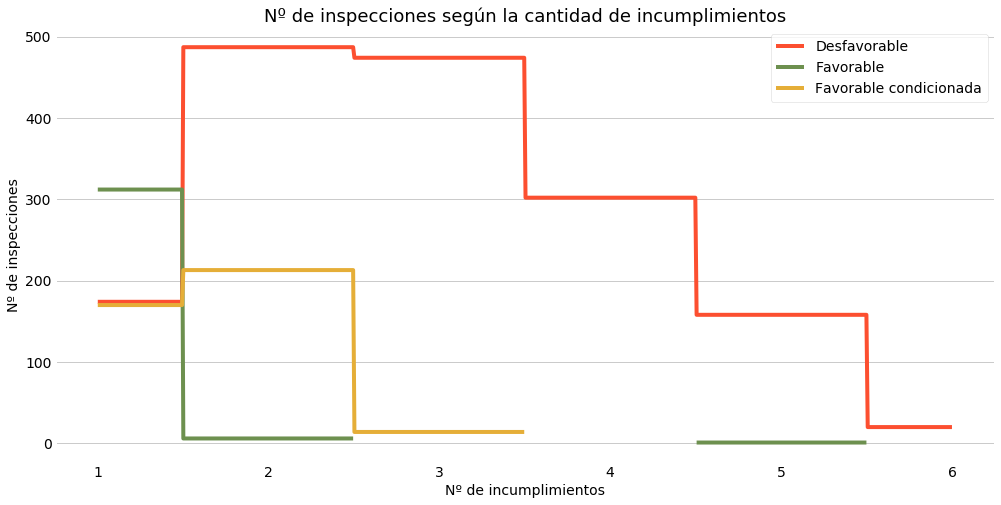

In [133]:
x = np.arange(0,7)
f1 = interp1d(x, NumInc['Desf'], kind='nearest')
f2 = interp1d(x, NumInc['Fav'], kind='nearest')
f3 = interp1d(x, NumInc['FavCond'], kind='nearest')

xnew = np.linspace(1, 6, num=660, endpoint=True)
plt.plot(xnew, f1(xnew), '-', alpha=1, color=sns.color_palette()[1], label='Desfavorable')
plt.plot(xnew, f2(xnew), '-', alpha=1, color=sns.color_palette()[3], label='Favorable')
plt.plot(xnew, f3(xnew), '-', alpha=1, color=sns.color_palette()[2], label='Favorable condicionada')

plt.grid(axis='y')
plt.legend()
plt.xlabel('Nº de incumplimientos')
plt.ylabel('Nº de inspecciones')

plt.title('Nº de inspecciones según la cantidad de incumplimientos',fontsize= 18)
plt.savefig('images/inspec-inc.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

In [134]:
inspecDes = inspec[(inspec['Resul']== 'Desfavorable')]
inspecFav = inspec[(inspec['Resul']== 'Favorable')]
inspecFavCond = inspec[(inspec['Resul']== 'Favorable condicionado')]

In [135]:
datos = []
for i in range(1,7):
    datos.append([i, 
                  inspecDes['Inc' + str(i)].sum(), 
                 inspecFav['Inc' + str(i)].sum(),
                 inspecFavCond['Inc' + str(i)].sum()])
IncxInspec = pd.DataFrame(datos,columns=['Inc','QDes','QFav','QFavCond'])
IncxInspec

,Inc,QDes,QFav,QFavCond
0,1,822,62,90
1,2,735,31,48
2,3,814,53,83
3,4,119,0,5
4,5,1568,128,327
5,6,630,55,85


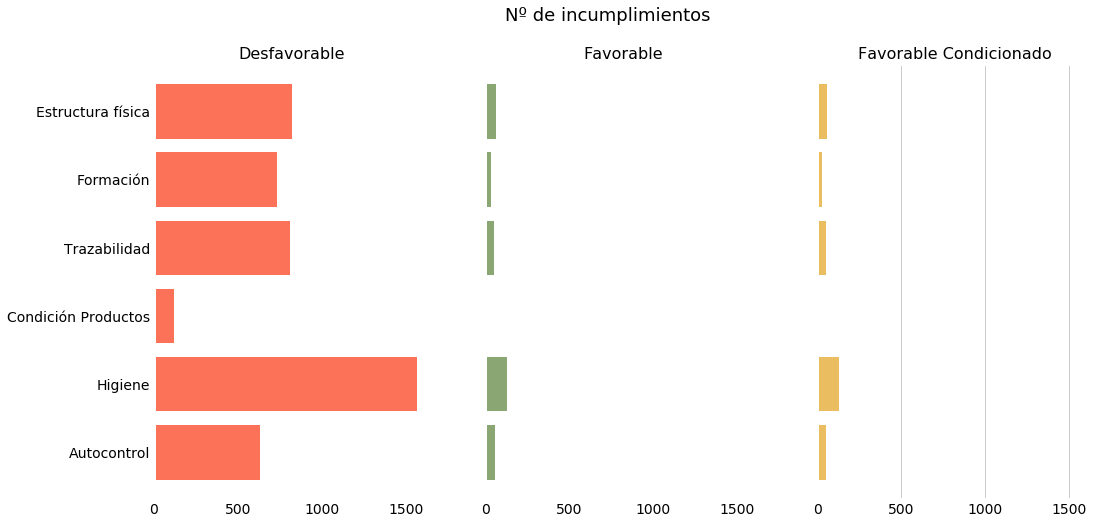

In [136]:
# Gráfico de incumplimientos para tipo de inspecciones desfavorables

TiposInc = ['Estructura física',
    'Formación',
    'Trazabilidad',
    'Condición Productos',
    'Higiene',
    'Autocontrol']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Nº de incumplimientos',fontsize= 18)

x = TiposInc
y1 =IncxInspec['QDes']
y2 = IncxInspec['QFav']
y3 =  IncxInspec['QFav']

ax1.barh(x, y1, alpha=0.8, color=sns.color_palette()[1])
ax2.barh(x, y2, alpha=0.8, color=sns.color_palette()[3])
ax3.barh(x, y3, alpha=0.8, color=sns.color_palette()[2])

plt.gca().invert_yaxis()

plt.grid(axis='x')
ax1.set_title('Desfavorable',fontsize= 16)
ax2.set_title('Favorable',fontsize= 16)
ax3.set_title('Favorable Condicionado',fontsize= 16)

plt.savefig('images/tipo-incumplimientos.png', bbox_inches='tight', pad_inches=0.3, dpi=220,facecolor='white')
plt.show()

In [137]:
# Nº de inspecciones clasificadas pro resultado
inspecs = inspec.groupby('Resul').count()
inspecs['Nombre']

Resul
Desfavorable              1643
Favorable                 2748
Favorable condicionado     460
Name: Nombre, dtype: int64

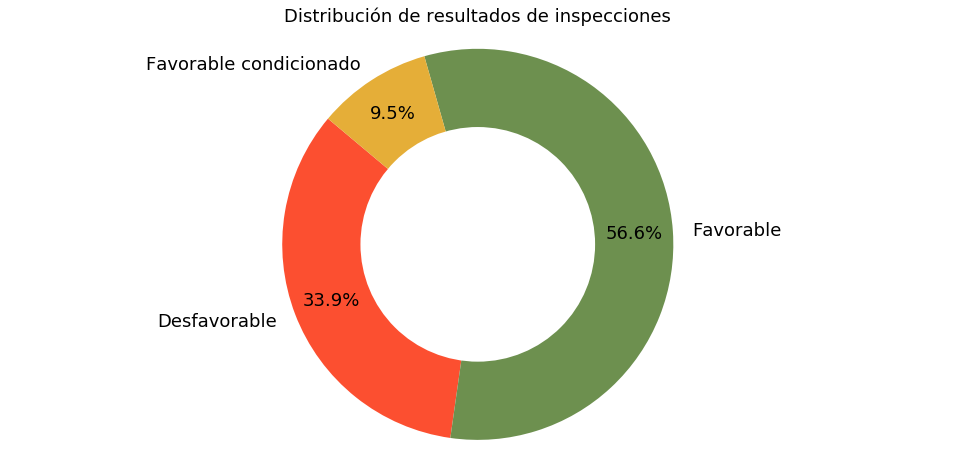

In [138]:
# Pie chart
labels = inspecs.index
sizes = inspecs['Nombre']
#colors
colors = [sns.color_palette()[1],sns.color_palette()[3],sns.color_palette()[2]]
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=140, 
        pctdistance=0.8, textprops={'fontsize': 18})
#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Distribución de resultados de inspecciones',fontsize= 18)
plt.savefig('images/distrib-resul.png', bbox_inches='tight', pad_inches=0.3, dpi=220,facecolor='white')
plt.show()

In [139]:
inspec['Nombre'].count()

4851

In [140]:
inspec['FechaInspec'] = pd.to_datetime(inspec['FechaInspec'])

In [141]:
inspec['FechaInspec'].max()

Timestamp('2019-12-06 00:00:00')

In [142]:
inspec['FechaInspec'].min()

Timestamp('2018-01-02 00:00:00')